In [2]:
# Libraries
import glob
from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

## 2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates.

I´m going to use the glob library to read all the pictures in the profile_pictures folder 

In [3]:
pictures = glob.glob("profile_pictures/*")
pictures

['profile_pictures\\AlejandroC.jpeg',
 'profile_pictures\\CamiloLR.jpeg',
 'profile_pictures\\Carlos Andrés Sepúlveda Calle.jpeg',
 'profile_pictures\\Carolina Bareño.jpg',
 'profile_pictures\\Daniel V.jpeg',
 'profile_pictures\\Daniela Hernandez.jpeg',
 'profile_pictures\\DanielaAguiarV.jpg',
 'profile_pictures\\David Zapata.jpeg',
 'profile_pictures\\DavidG.jpg',
 'profile_pictures\\JD.jpg',
 'profile_pictures\\JorgeMorales.jpeg',
 'profile_pictures\\Jose Alejandro Llano.jpeg',
 'profile_pictures\\JoseAlcocer.jpg',
 'profile_pictures\\JuanCh.png',
 'profile_pictures\\JuanPabloM.png',
 'profile_pictures\\Laura.jpeg',
 'profile_pictures\\Lina Martinez.jpeg',
 'profile_pictures\\ManuelaPiedrahita.jpeg',
 'profile_pictures\\MariaMartinez.jpg',
 'profile_pictures\\mauriciosierrav.png',
 'profile_pictures\\MiltonBenavides.jpg',
 'profile_pictures\\Robinson_Alvarez.jpeg',
 'profile_pictures\\Santiago M.jpeg',
 'profile_pictures\\SantiagoRG.jpeg',
 'profile_pictures\\VanessaLopera.jpg',
 'pr

## Edit your picture to be 256x256 pixels, grayscale (single channel)

Selecting personal picture and using skimage.color.rgb2gray function to convert original picture in grayscale single chanel and skimage.color.resize to resize it

In [6]:
personal_picture = [picture for picture in pictures if picture == "profile_pictures\\walter.jpeg"]
personal_picture = imread(personal_picture[0])
img_resize = resize(personal_picture, (256,256))
personal_gray_picture = rgb2gray(img_resize)

### Plot your edited face

Using matplotlib to plot the image

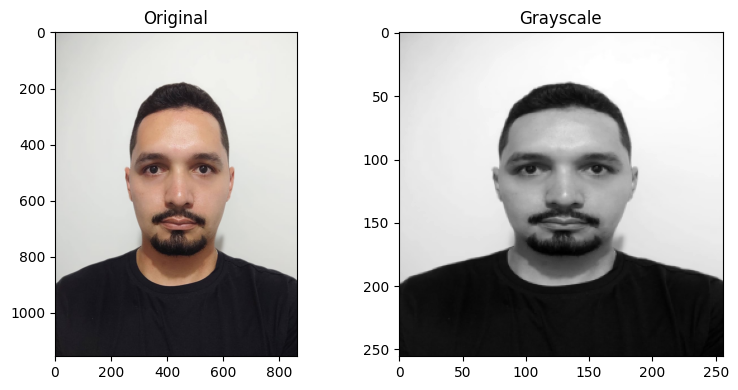

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(personal_picture)
ax[0].set_title("Original")
ax[1].imshow(personal_gray_picture, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

### Calculate and plot the average face of the cohort.

C:\Users\user\AppData\Local\Temp\ipykernel_20148\4079447455.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i+1)


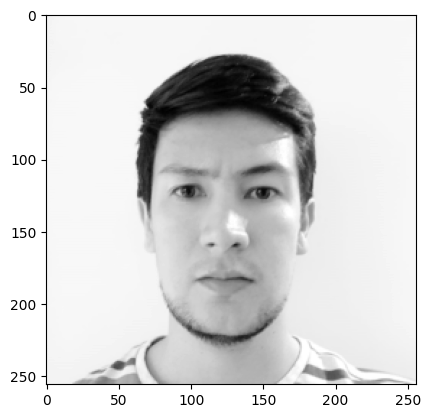

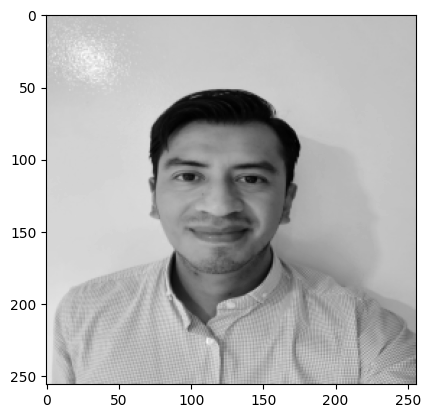

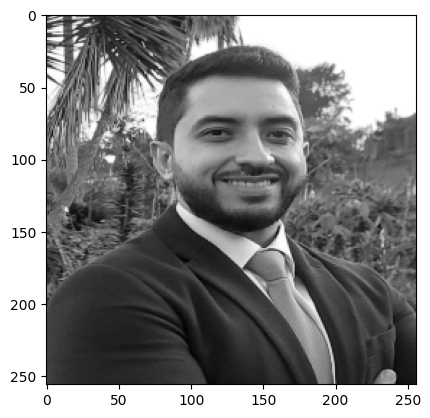

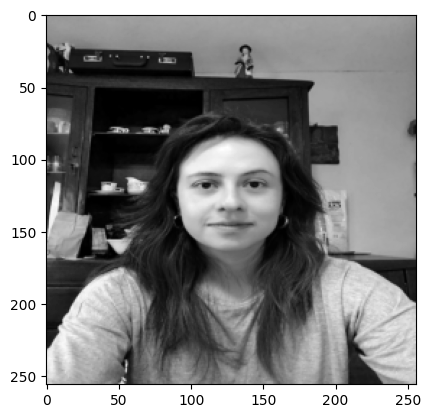

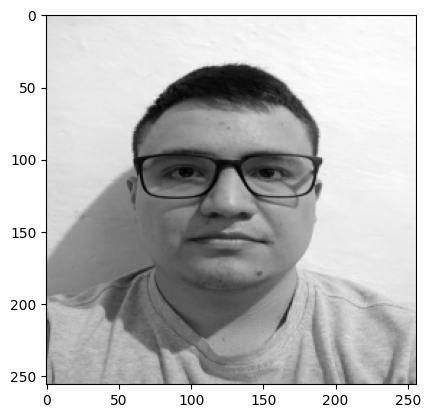

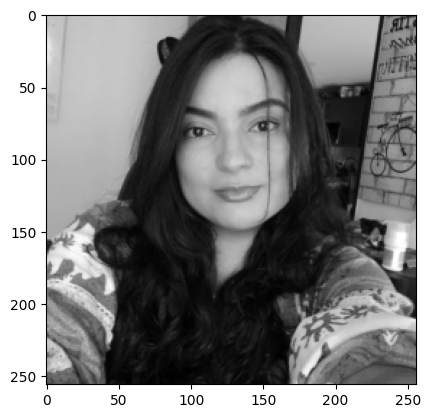

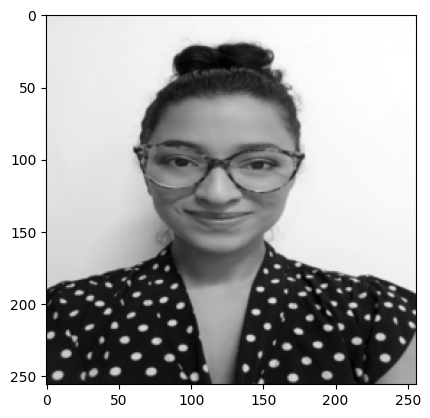

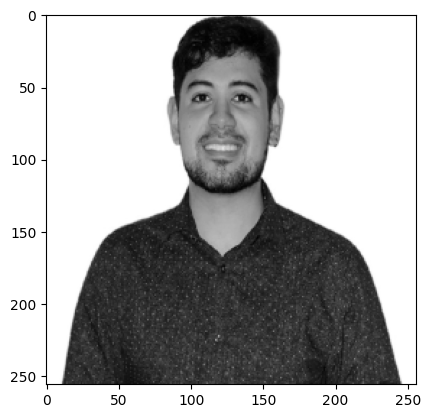

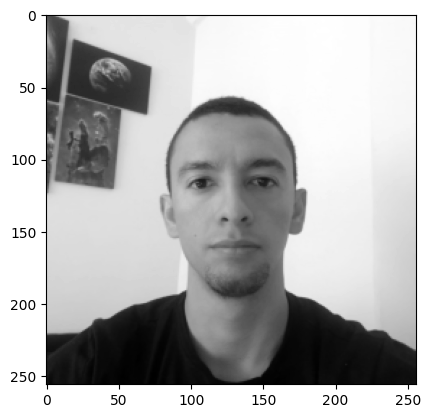

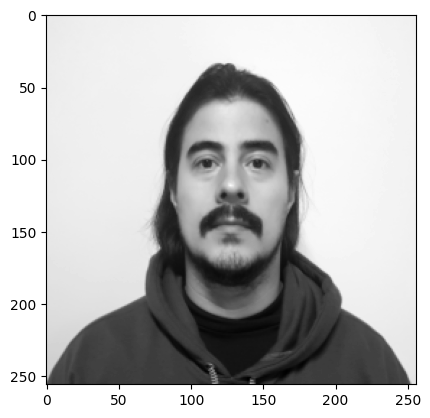

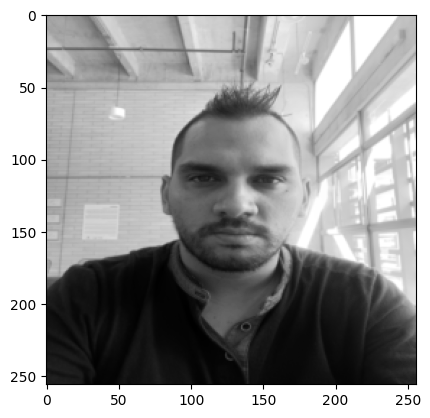

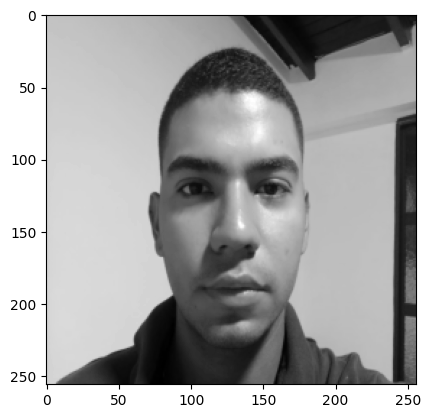

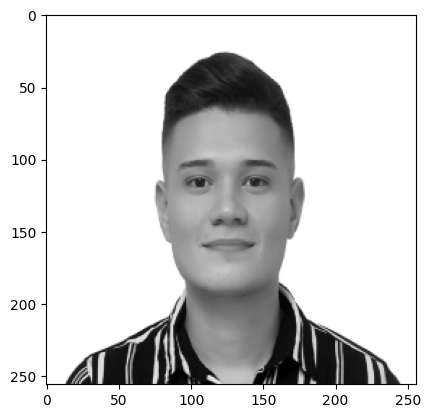

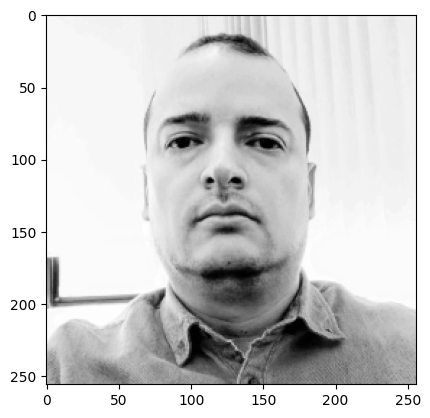

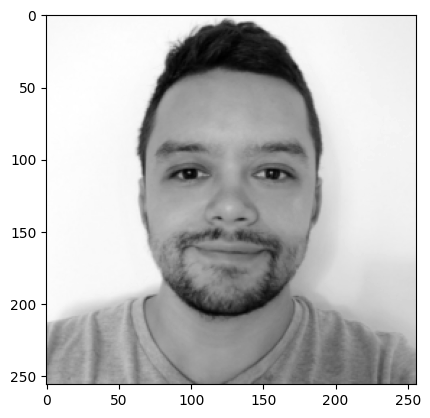

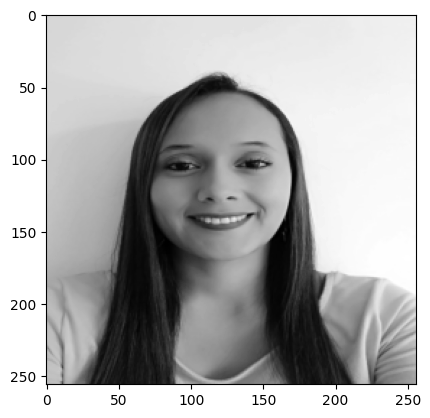

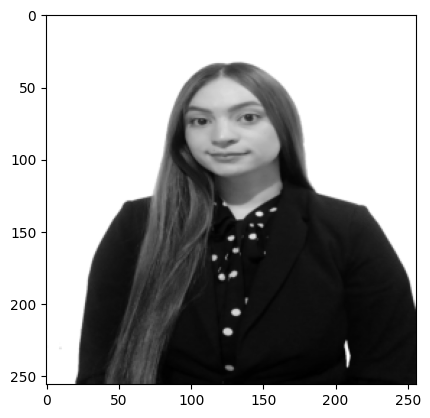

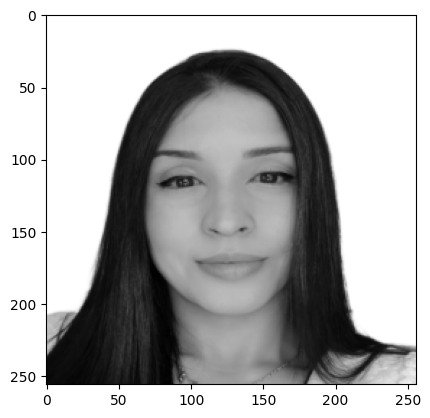

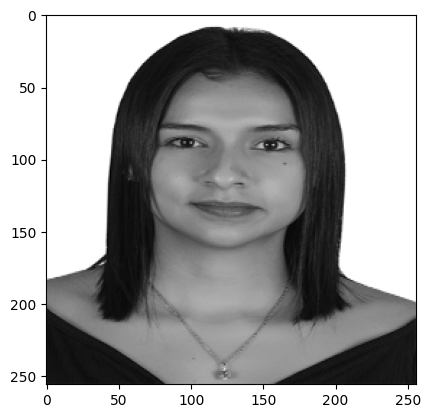

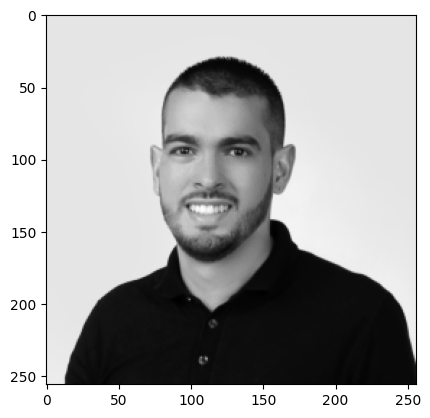

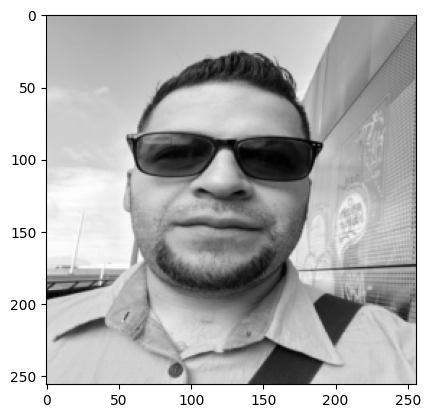

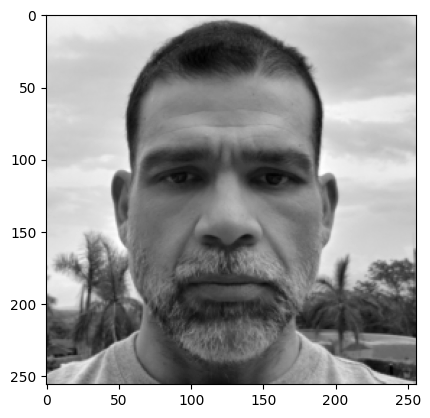

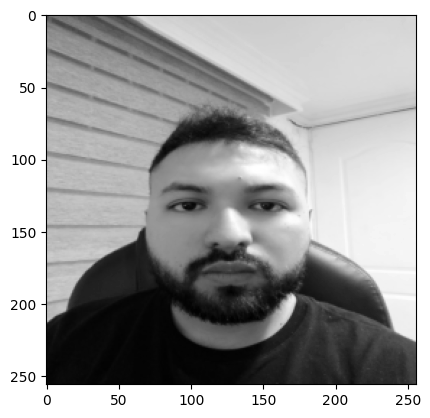

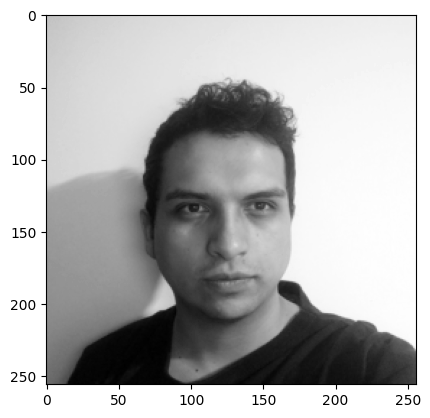

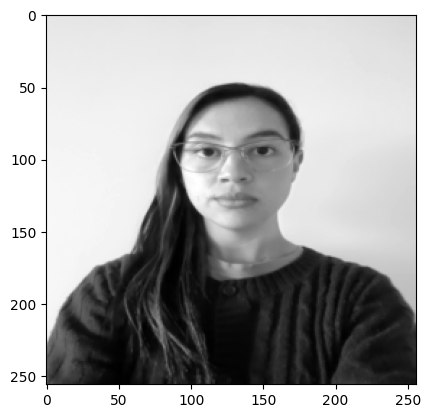

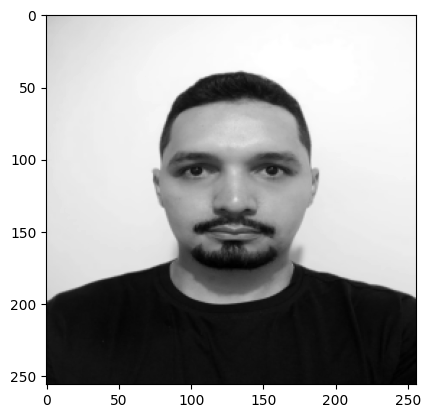

In [8]:
format_pictures = []
i = 0
for picture in pictures:
    original_picture = imread(picture)
    # Resizing each image
    img_resize = resize(original_picture, (256,256, 3))
    # Convert to single channel
    gray_picture = rgb2gray(img_resize)
    format_pictures.append(gray_picture)
    plt.figure(i+1)
    i += 1
    # Plotting each image
    img = plt.imshow(gray_picture, cmap=plt.cm.gray)
    plt.show

To calculate the average of the cohort i´m going to sum each pixel and dividig for the total of the images and saving it in a average matrix

In [9]:
avg_matrix = np.zeros([256,256])
for picture in format_pictures:
    avg_matrix += picture
avg_matrix = avg_matrix/len(format_pictures)

Plotting the average

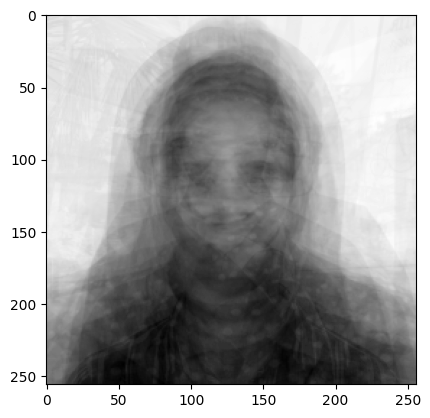

In [10]:
plt.imshow(avg_matrix, cmap=plt.cm.gray)

### How distant is your face from the average? How would you measure it?

To calculate the distance between the personal image and the average i´m going to take the k-Nearest Neighbour as example:

"k-Nearest Neighbour (kNN) is a machine learning classification algorithm that utilizes **distance matrices under the hood**. The idea is simple, we can predict the class of any given data point by looking at the classes of the 
nearest neighboring labelled data points. Whichever class is most common within the neighbors is the class we predict for the data point.

In order to implement the kNN classifier, you'll need to compute the distances between all labelled-unlabelled pairs. These distances can be stored in an 
 matrix 
, where 
 represents the distance between the ith unlabelled point and the jth labelled point"

Following this description and implementing the ext formula, we can calculate the distance 

 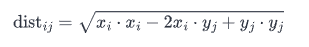

 Reference: https://jaykmody.com/blog/distance-matrices-with-numpy/

In [11]:
x2 = np.sum(personal_gray_picture**2, axis=1) # shape of (m)
y2 = np.sum(avg_matrix**2, axis=1) # shape of (n)

xy = np.matmul(personal_gray_picture, avg_matrix.T)

x2 = x2.reshape(-1, 1)
dists = np.sqrt(x2 - 2*xy + y2)

In [12]:
print(dists)

[[ 1.34150489  1.3777247   1.41954225 ...  9.02473865  9.04196452
   9.03891239]
 [ 1.34664565  1.38267774  1.42441172 ...  9.03193488  9.04919665
   9.04615671]
 [ 1.36126342  1.39679097  1.43830653 ...  9.05136849  9.06873663
   9.06573089]
 ...
 [11.52501754 11.51072964 11.49500391 ...  3.93526193  3.91486235
   3.91438519]
 [11.52526634 11.51094437 11.49519799 ...  3.93558688  3.91530243
   3.91464595]
 [11.52482909 11.51049049 11.49478275 ...  3.93175438  3.9114511
   3.91057023]]


Plotting the distance

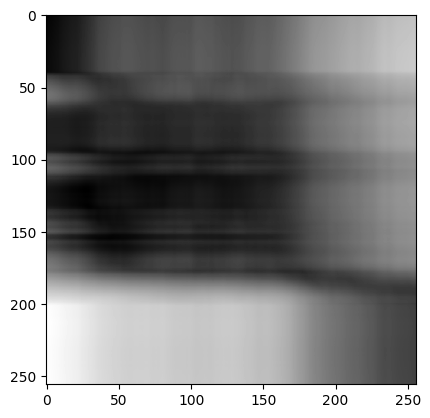

In [13]:
plt.imshow(dists, cmap=plt.cm.gray)